a) Given a set of ambulances, count how many is covered by r.

b) Given a percentage of coverage, determine the minimum radius that achieves this coverage.

In [1]:
import read_data
import numpy as np
from matplotlib import pyplot as plt

(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()
allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)

ind = np.random.randint(0, allbases.shape[0], 8)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)

distance = times[ind,:]

In [2]:
def radius_to_coverage (r1=600, graph=True):
    r1_coverage = np.any(distance < r1, 0)
    r1_covered = np.nonzero(r1_coverage)
    r1_exposed = np.nonzero(np.logical_not(r1_coverage))

    c = np.shape(r1_covered)[1]
    e = np.shape(r1_exposed)[1]
    ratio = (c / (c + e))
    

    if graph:
        plt.figure()
        plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
        plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
        plt.scatter(bases[:,0],bases[:,1], c='y')
        plt.show()
    
    return 100 * ratio

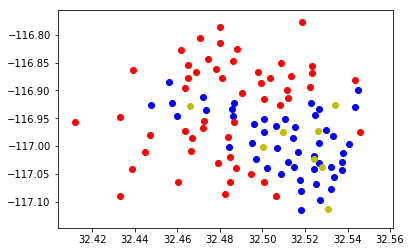

48.0

In [3]:
radius_to_coverage(r1=500)

In [4]:
def coverage_to_radius(target_coverage, step=True):
    r = 1700
    actual_coverage = 99999999
    
    
    # Binary search downwards from r=2000 towards optimal r.
    if step: print("Going down. Actual should go below target. ")
    while (actual_coverage - target_coverage >= 0):
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        if actual_coverage - target_coverage == 0: return r
        r /= 2
        
    
    
    # Binary search towards target_coverage
    if step: print("Going back up.")
    while (target_coverage - actual_coverage >= 0):
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        if actual_coverage - target_coverage == 0: return r
        r += 200
        
    
    if step: print ("Going back down.")
    while (actual_coverage - target_coverage > 0):
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("Difference: %f"%(actual_coverage - target_coverage))
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        
        if actual_coverage - target_coverage == 0: return r
        r -= 3
    
    if step: print ("Okay, they should be equal now. Go for the tight min.")
    while (actual_coverage == target_coverage):
        r -= 0.3
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("Difference: %f"%(actual_coverage - target_coverage))
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
    r+=0.6
    
    return r

In [5]:
coverage_to_radius(100)

Going down. Actual should go below target. 
target coverage:  100
actual coverage:  99.0 
r:  1700 

Going back up.
target coverage:  100
actual coverage:  78.0 
r:  850.0 

target coverage:  100
actual coverage:  92.0 
r:  1050.0 

target coverage:  100
actual coverage:  97.0 
r:  1250.0 

target coverage:  100
actual coverage:  99.0 
r:  1450.0 

target coverage:  100
actual coverage:  99.0 
r:  1650.0 

target coverage:  100
actual coverage:  100.0 
r:  1850.0 



1850.0

In [6]:
all_radiuses = []
for coverage in range (1, 101):
    print ("Doing: " , coverage)
    r = coverage_to_radius(coverage, step=False)
    all_radiuses.append([coverage, r])
    print ("Finished.")
    

Doing:  1
Finished.
Doing:  2
Finished.
Doing:  3
Finished.
Doing:  4
Finished.
Doing:  5
Finished.
Doing:  6
Finished.
Doing:  7
Finished.
Doing:  8
Finished.
Doing:  9
Finished.
Doing:  10
Finished.
Doing:  11
Finished.
Doing:  12
Finished.
Doing:  13
Finished.
Doing:  14
Finished.
Doing:  15
Finished.
Doing:  16
Finished.
Doing:  17
Finished.
Doing:  18
Finished.
Doing:  19
Finished.
Doing:  20
Finished.
Doing:  21
Finished.
Doing:  22
Finished.
Doing:  23
Finished.
Doing:  24
Finished.
Doing:  25
Finished.
Doing:  26
Finished.
Doing:  27
Finished.
Doing:  28
Finished.
Doing:  29
Finished.
Doing:  30
Finished.
Doing:  31
Finished.
Doing:  32
Finished.
Doing:  33
Finished.
Doing:  34
Finished.
Doing:  35
Finished.
Doing:  36
Finished.
Doing:  37
Finished.
Doing:  38
Finished.
Doing:  39
Finished.
Doing:  40
Finished.
Doing:  41
Finished.
Doing:  42
Finished.
Doing:  43
Finished.
Doing:  44
Finished.
Doing:  45
Finished.
Doing:  46
Finished.
Doing:  47
Finished.
Doing:  48
Finished.
D

In [7]:

for p in all_radiuses:
    print (np.array(p))

[   1.    106.25]
[   2.     159.125]
[   3.     174.125]
[   4.     180.125]
[   5.     198.125]
[   6.     207.125]
[   7.     204.725]
[   8.    251.25]
[   9.    281.25]
[  10.    278.85]
[  11.    290.25]
[  12.    299.25]
[  13.    306.25]
[  14.    307.85]
[  15.    325.25]
[  16.    328.25]
[  17.    337.25]
[  18.    343.25]
[  19.    349.25]
[  20.    346.85]
[  21.    355.25]
[  22.    370.25]
[  23.    376.25]
[  24.    373.85]
[  25.    379.25]
[  26.    385.25]
[  27.    394.25]
[  28.    391.85]
[  29.    397.85]
[  30.    397.85]
[  31.    397.85]
[  32.    406.25]
[  33.    418.25]
[  34.    421.25]
[  35.  425.]
[  36.   431.5]
[  37.   429.1]
[  38.   434.5]
[  39.   432.1]
[  40.   446.5]
[  41.   461.5]
[  42.   464.5]
[  43.   467.5]
[  44.   473.5]
[  45.   476.5]
[  46.   494.5]
[  47.   492.1]
[  48.   524.5]
[  49.   533.5]
[  50.   531.1]
[  51.   536.5]
[  52.   551.5]
[  53.   566.5]
[  54.   572.5]
[  55.   570.1]
[  56.   582.1]
[  57.   588.1]
[  58.   6

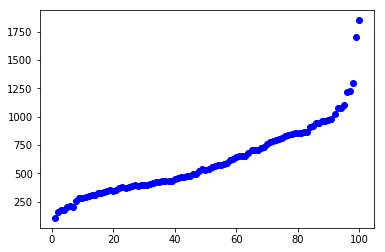

In [8]:
radius_array = np.array(all_radiuses)


plt.figure()
plt.scatter(radius_array[:,0],radius_array[:,1], c='b')
plt.show()